In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline

# Models - bagging-based
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score  # for regression
from sklearn.metrics import accuracy_score, classification_report  # for classification

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [6]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [7]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


# Training Models

In [14]:
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(handle_unknown="ignore", sparse_output=False), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
rf_pipeline = Pipeline([
    ("preprocessor", ct),
    ("rf", RandomForestRegressor(random_state=42))
])

bagging_pipeline = Pipeline([
    ("preprocessor", ct),
    ("bagging", BaggingRegressor(estimator=RandomForestRegressor(random_state=42), random_state=42))
])

rf_pipeline.fit(X_train, y_train)
bagging_pipeline.fit(X_train, y_train)

rf_preds = rf_pipeline.predict(X_test)
bag_preds = bagging_pipeline.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_preds))
print("Bagging R²:", r2_score(y_test, bag_preds))

Random Forest R²: 0.5245596701545145
Bagging R²: 0.5488670489874753


In [22]:
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
bag_rmse = mean_squared_error(y_test, bag_preds, squared=False)

print("Random Forest RMSE:", rf_rmse)
print("Bagging RMSE:", bag_rmse)

Random Forest RMSE: 2.197245121601574
Bagging RMSE: 2.1403400315272836


# Results

In [25]:
print("y_test shape:", y_test.shape)
print("bag_preds shape:", bag_preds.shape)

y_test shape: (1254, 1)
bag_preds shape: (1254,)


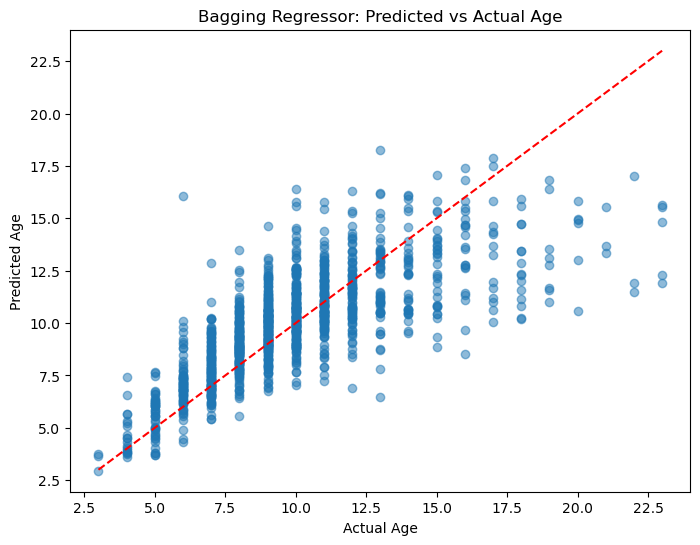

In [ ]:
# Mismatched need to flatten y_test (2D pandas DataFrame to 1D numpy array)
plt.figure(figsize=(8, 6))
plt.scatter(y_test.values.ravel(), bag_preds, alpha=0.5)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Bagging Regressor: Predicted vs Actual Age")
plt.plot(
    [min(y_test.values.ravel()), max(y_test.values.ravel())],
    [min(y_test.values.ravel()), max(y_test.values.ravel())],
    'r--'
)
plt.show()

I trained a Random Forest Regressor and Bagging Regressor to predict abalone rings. Bagging performed slightly better with a R² of 0.55 and RMSE of 2.14. 